In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
customers_df = pd.read_csv('customers.csv')
events_df = pd.read_csv('events.csv')
items_df = pd.read_csv('line_items.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  10000 non-null  object
 1   device_id    10000 non-null  object
 2   location     10000 non-null  object
 3   currency     10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [4]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147208 entries, 0 to 147207
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_id         147208 non-null  int64 
 1   customer_id      147208 non-null  object
 2   event_data       147208 non-null  object
 3   event_timestamp  147208 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741 entries, 0 to 31740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line_item_id  31741 non-null  int64 
 1   order_id      31741 non-null  object
 2   item_id       31741 non-null  int64 
 3   quantity      31741 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 992.0+ KB


In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        9165 non-null   object
 1   customer_id     9165 non-null   object
 2   status          9165 non-null   object
 3   checked_out_at  9165 non-null   object
dtypes: object(4)
memory usage: 286.5+ KB


In [12]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   price   15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [6]:
data_df = pd.merge(customers_df, events_df, on="customer_id", how="inner")

In [7]:
data_df = pd.merge(data_df,orders_df, on="customer_id", how="inner")

In [8]:
data_df = pd.merge(data_df, items_df, on="order_id", how="inner")

In [9]:
data_df = pd.merge(data_df, products_df, left_on="item_id", right_on = "id", how="inner")

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  id               578320 non-null  int64  
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(1), int64(5), object(10)
me

In [11]:
data_df.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
id                 0
name               0
price              0
dtype: int64

In [12]:
data_df.head(3)

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99


In [13]:
import json

In [14]:
# extract data_type from the event_data column
data_df['event_type'] = data_df['event_data'].apply(lambda x: json.loads(x)['event_type'])

In [15]:
data_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,add_to_cart


In [16]:
# drop the event_data column
data_df.drop(columns=['event_data'], inplace=True)


In [17]:
data_df.head(3)

,customer_id,device_id,location,currency,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit


In [18]:
# returns the unique list of countries in the dataframe
data_df['location'].unique()

array(['Saint Helena', 'Mali', 'Grenada',
       'United States Minor Outlying Islands',
       'Saint Pierre and Miquelon', 'Palestinian Territory', 'Israel',
       'French Guiana', 'India', 'Switzerland', 'Canada',
       'British Virgin Islands', 'Barbados', 'Chad',
       'Bouvet Island (Bouvetoya)', 'Mauritania', 'Thailand', 'Tuvalu',
       'Greenland', 'Guatemala', 'Australia', 'Costa Rica', 'Angola',
       'Denmark', 'Taiwan', 'Cocos (Keeling) Islands', 'Chile', 'Iraq',
       'Antigua and Barbuda', 'Guam', 'Singapore', 'Kazakhstan',
       'Guinea-Bissau', 'Algeria', 'Samoa', 'Puerto Rico', 'Eritrea',
       'Monaco', 'Falkland Islands (Malvinas)', 'Rwanda', 'Guyana',
       'North Macedonia', 'Germany', 'Benin', 'Korea',
       'Syrian Arab Republic', 'Mauritius', 'Vanuatu', 'Congo', 'Panama',
       'Sierra Leone', 'Saint Martin', 'Brunei Darussalam',
       'Solomon Islands', 'El Salvador', 'Cyprus', 'Netherlands Antilles',
       'South Georgia and the South Sandwich Isl

In [19]:
country_currency = {
    'Oman':	'OMR',
'United States of America':	'USD',
'Saint Helena':	'SHP',
'Djibouti':	'DJF',
'Guinea-Bissau':	'XOF',
'Moldova':	'MDL',
'Ecuador':	'USD',
'Micronesia':	'USD',
'Antigua and Barbuda':	'XCD',
'Mali':	'XOF',
'Wallis and Futuna':	'XPF',
'Guam':	'USD',
'Grenada':	'XCD',
'United States Minor Outlying Islands':	'USD',
'Aruba':	'AWG',
'Germany':	'EUR',
'Saint Pierre and Miquelon':	'EUR',
'Tokelau':	'NZD',
'Pakistan':	'PKR',
'Equatorial Guinea':	'XAF',
'Sudan':	'SDG',
'Fiji':	'FJD',
'Montenegro':	'EUR',
'Palestinian Territory':	'ILS',
'North Macedonia':	'MKD',
'Andorra':	'EUR',
'Qatar':	'QAR',
'Portugal':	'EUR',
'South Georgia and the South Sandwich Islands':	'GBP',
'Bouvet Island (Bouvetoya)':	'NOK',
'Libyan Arab Jamahiriya':	'LYD',
'Israel':	'ILS',
'Saint Kitts and Nevis':	'XCD',
'Netherlands Antilles':	'ANG',
'French Guiana':	'EUR',
'Uzbekistan':	'UZS',
'India':	'INR',
'Switzerland':	'CHF',
'Canada':	'CAD',
'Philippines':	'PHP',
'Christmas Island':	'AUD',
'Liechtenstein':	'CHF',
'Cuba':	'CUP',
'Malta':	'EUR',
'Samoa':	'WST',
'British Virgin Islands':	'USD',
'Norway':	'NOK',
'Barbados':	'BBD',
'Senegal':	'XOF',
'Iceland':	'ISK',
'China':	'CNY',
'Guadeloupe':	'EUR',
'Tanzania':	'TZS',
'Chad':	'XAF',
'Mauritania':	'MRU',
'Thailand':	'THB',
'Monaco':	'EUR',
'Tuvalu':	'AUD',
'Tajikistan':	'TJS',
'Poland':	'PLN',
'Greenland':	'DKK',
'Saint Martin':	'EUR',
'Guatemala':	'GTQ',
'Bermuda':	'BMD',
'Australia':	'AUD',
'Malawi':	'MWK',
'Mozambique':	'MZN',
'Costa Rica':	'CRC',
'United States Virgin Islands':	'USD',
'Egypt':	'EGP',
'Armenia':	'AMD',
'Anguilla':	'XCD',
'United Arab Emirates':	'AED',
'Czech Republic':	'CZK',
'Jamaica':	'JMD',
'Lebanon':	'LBP',
'Nauru':	'AUD',
'Myanmar':	'MMK',
'Angola':	'AOA',
'Benin':	'XOF',
'Saint Lucia':	'XCD',
'Russian Federation':	'RUB',
'Sierra Leone':	'SLL',
'Suriname':	'SRD',
'Turkey':	'TRY',
'Greece':	'EUR',
'Denmark':	'DKK',
'Jordan':	'JOD',
'Falkland Islands (Malvinas)':	'FKP',
'Mayotte':	'EUR',
'Taiwan':	'TWD',
'Norfolk Island':	'AUD',
'Iran':	'IRR',
'Mongolia':	'MNT',
'Yemen':	'YER',
'Cocos (Keeling) Islands':	'AUD',
'Luxembourg':	'EUR',
'Bulgaria':	'BGN',
'Northern Mariana Islands':	'USD',
'Swaziland':	'SZL',
'Belize':	'BZD',
'Ethiopia':	'ETB',
'Ukraine':	'UAH',
'Puerto Rico':	'USD',
'Chile':	'CLP',
'Syrian Arab Republic':	'SYP',
'Iraq':	'IQD',
'Zimbabwe':	'ZWL',
'Congo':	'CDF',
'Svalbard & Jan Mayen Islands':	'NOK',
'Bangladesh':	'BDT',
'Bahrain':	'BHD',
'Singapore':	'SGD',
'Bahamas':	'BSD',
'Serbia':	'RSD',
'Kazakhstan':	'KZT',
'British Indian Ocean Territory (Chagos Archipelago)':	'USD',
'Brazil':	'BRL',
'Algeria':	'DZD',
'Lao People\'s Democratic Republic':	'LAK',
'Honduras':	'HNL',
'Nepal':	'NPR',
'Marshall Islands':	'USD',
'Eritrea':	'ERN',
'Saudi Arabia':	'SAR',
'Liberia':	'LRD',
'Venezuela':	'VES',
'Isle of Man':	'GBP',
'Finland':	'EUR',
'Paraguay':	'PYG',
'Vanuatu':	'VUV',
'French Polynesia':	'XPF',
'Antarctica (the territory South of 60 deg S)':	'NOK',
'Cote d\'Ivoire':	'XOF',
'San Marino':	'EUR',
'Turkmenistan':	'TMT',
'United Kingdom':	'GBP',
'Holy See (Vatican City State)':	'EUR',
'Rwanda':	'RWF',
'New Caledonia':	'XPF',
'New Zealand':	'NZD',
'Bosnia and Herzegovina':	'BAM',
'Martinique':	'EUR',
'Western Sahara':	'MAD',
'Nicaragua':	'NIO',
'Romania':	'RON',
'Guernsey':	'GBP',
'Guyana':	'GYD',
'Cambodia':	'KHR',
'Saint Barthelemy':	'EUR',
'Sri Lanka':	'LKR',
'Pitcairn Islands':	'NZD',
'Korea':	'KRW',
'Slovakia (Slovak Republic)':	'EUR',
'Mauritius':	'MUR',
'Timor-Leste':	'USD',
'Jersey':	'GBP',
'Cape Verde':	'CVE',
'Seychelles':	'SCR',
'Bolivia':	'BOB',
'Panama':	'PAB',
'Japan':	'JPY',
'Morocco':	'MAD',
'Palau':	'USD',
'Azerbaijan':	'AZN',
'Brunei Darussalam':	'BND',
'Mexico':	'MXN',
'Solomon Islands':	'SBD',
'El Salvador':	'USD',
'Spain':	'EUR',
'Sweden':	'SEK',
'Gambia':	'GMD',
'Cyprus':	'EUR',
'Croatia':	'HRK',
'Albania':	'ALL',
'Netherlands':	'EUR',
'Argentina':	'ARS',
'Tunisia':	'TND',
'Nigeria':	'NGN',
'Dominican Republic':	'DOP',
'Latvia':	'EUR',
'Afghanistan':	'AFN',
'Burundi':	'BIF',
'Hungary':	'HUF',
'Vietnam':	'VND',
'Ireland':	'EUR',
'Kenya':	'KES',
'Malaysia':	'MYR',
'Lithuania':	'LTL',
'Cook Islands':	'NZD',
'Burkina Faso':	'XOF',
'Papua New Guinea':	'PGK',
'Heard Island and McDonald Islands':	'AUD',
'Central African Republic':	'XAF',
'Uganda':	'UGX',
'Austria':	'EUR',
'Kuwait':	'KWD',
'Somalia':	'SOS',
'Ghana':	'GHS',
'Comoros':	'KMF',
'Madagascar':	'MGA',
'Maldives':	'MVR',
'Dominica':	'XCD',
'Bhutan':	'BTN',
'Faroe Islands':	'DKK',
'Sao Tome and Principe':	'STD',
'Belarus':	'BYN',
'Niue':	'NZD',
'Peru':	'PEN',
'Hong Kong':	'HKD',
'Estonia':	'EUR',
'Lesotho':	'LSL',
'Haiti':	'HTG',
'Niger':	'XOF',
'Georgia':	'GEL',
'Belgium':	'EUR',
'South Africa':	'ZAR',
'Macao':	'MOP',
'Gabon':	'XAF',
'Uruguay':	'UYU',
'Kyrgyz Republic':	'KGS',
'Saint Vincent and the Grenadines':	'XCD',
'Turks and Caicos Islands':	'USD',
'Reunion':	'EUR',
'American Samoa':	'USD',
'Slovenia':	'EUR',
'Tonga':	'TOP',
'Guinea':	'GNF',
'France':	'EUR',
'Cameroon':	'XAF',
'Montserrat':	'XCD',
'Togo':	'XOF',
'Kiribati':	'AUD',
'Gibraltar':	'GIP',
'Italy':	'EUR',
'French Southern Territories':	'EUR',
'Zambia':	'ZMW',
'Trinidad and Tobago':	'TTD',
'Indonesia':	'IDR',
'Botswana':	'BWP',
'Namibia':	'NAD',
'Colombia':	'COP',
'Cayman Islands':	'KYD'
}

In [20]:
# assign the appropriate currency to each countries
data_df['currency'] = data_df['location'].map(country_currency)

In [21]:
data_df.head(3)

,customer_id,device_id,location,currency,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14786,2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14787,2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14788,2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit


In [22]:
# split the event_timestamp column into date and time
data_df[['event_date', 'event_time']] = data_df['event_timestamp'].str.split(' ', expand=True)

In [23]:
data_df.head()

,customer_id,device_id,location,currency,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type,event_date,event_time
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14786,2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-26,22:05:58.863661
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14787,2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-27,07:14:33.987347
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14788,2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-30,04:03:10.406559
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14789,2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-30,04:03:10.406561
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14790,2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,add_to_cart,2024-03-30,04:03:10.406769


In [24]:
# assign period of day an event occurred
def assign_period_of_day(time):
    hour = int(time.split(':')[0])  
    
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data_df['event_period'] = data_df['event_time'].apply(assign_period_of_day)

In [25]:
# drop event_timestamp column as it has become redundant
data_df.drop("event_timestamp", axis=1, inplace=True)

In [26]:
data_df.head()

,customer_id,device_id,location,currency,event_id,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type,event_date,event_time,event_period
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14786,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-26,22:05:58.863661,Evening
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14787,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-27,07:14:33.987347,Morning
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14788,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-30,04:03:10.406559,Early Morning
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14789,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-30,04:03:10.406561,Early Morning
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14790,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,add_to_cart,2024-03-30,04:03:10.406769,Early Morning


In [27]:
country_continent = {
    'United States of America':	'North America',
'Saint Helena':	'Africa',
'Djibouti':	'Africa',
'Guinea-Bissau':	'Africa',
'Moldova':	'Europe',
'Ecuador':	'South America',
'Micronesia':	'Oceania',
'Antigua and Barbuda':	'North America',
'Mali':	'Africa',
'Wallis and Futuna':	'Oceania',
'Guam':	'Oceania',
'Grenada':	'North America',
'United States Minor Outlying Islands':	'North America',
'Aruba':	'South America',
'Germany':	'Europe',
'Saint Pierre and Miquelon':	'North America',
'Tokelau':	'Oceania',
'Pakistan':	'Asia',
'Equatorial Guinea':	'Africa',
'Sudan':	'Africa',
'Fiji':	'Oceania',
'Montenegro':	'Europe',
'Palestinian Territory':	'Asia',
'North Macedonia':	'Europe',
'Andorra':	'Europe',
'Qatar':	'Asia',
'Portugal':	'Europe',
'South Georgia and the South Sandwich Islands':	'Antarctica',
'Bouvet Island (Bouvetoya)':	'Antarctica',
'Libyan Arab Jamahiriya':	'Africa',
'Israel':	'Asia',
'Saint Kitts and Nevis':	'North America',
'Netherlands Antilles':	'North America',
'French Guiana':	'South America',
'Uzbekistan':	'Asia',
'India':	'Asia',
'Switzerland':	'Europe',
'Canada':	'North America',
'Philippines':	'Asia',
'Christmas Island':	'Asia',
'Liechtenstein':	'Europe',
'Cuba':	'North America',
'Malta':	'Europe',
'Samoa':	'Oceania',
'British Virgin Islands':	'North America',
'Norway':	'Europe',
'Barbados':	'North America',
'Senegal':	'Africa',
'Iceland':	'Europe',
'China':	'Asia',
'Guadeloupe':	'North America',
'Tanzania':	'Africa',
'Chad':	'Africa',
'Mauritania':	'Africa',
'Thailand':	'Asia',
'Monaco':	'Europe',
'Tuvalu':	'Oceania',
'Tajikistan':	'Asia',
'Poland':	'Europe',
'Greenland':	'North America',
'Saint Martin':	'North America',
'Guatemala':	'North America',
'Bermuda':	'North America',
'Australia':	'Oceania',
'Malawi':	'Africa',
'Mozambique':	'Africa',
'Costa Rica':	'North America',
'United States Virgin Islands':	'North America',
'Egypt':	'Africa',
'Armenia':	'Asia',
'Anguilla':	'North America',
'United Arab Emirates':	'Asia',
'Czech Republic':	'Europe',
'Jamaica':	'North America',
'Lebanon':	'Asia',
'Nauru':	'Oceania',
'Myanmar':	'Asia',
'Angola':	'Africa',
'Benin':	'Africa',
'Saint Lucia':	'North America',
'Russian Federation':	'Europe',
'Sierra Leone':	'Africa',
'Suriname':	'South America',
'Turkey':	'Asia',
'Greece':	'Europe',
'Denmark':	'Europe',
'Jordan':	'Asia',
'Falkland Islands (Malvinas)':	'South America',
'Mayotte':	'Africa',
'Taiwan':	'Asia',
'Norfolk Island':	'Oceania',
'Iran':	'Asia',
'Mongolia':	'Asia',
'Yemen':	'Asia',
'Cocos (Keeling) Islands':	'Asia',
'Luxembourg':	'Europe',
'Bulgaria':	'Europe',
'Northern Mariana Islands':	'Oceania',
'Swaziland':	'Africa',
'Belize':	'North America',
'Ethiopia':	'Africa',
'Ukraine':	'Europe',
'Puerto Rico':	'North America',
'Chile':	'South America',
'Syrian Arab Republic':	'Asia',
'Iraq':	'Asia',
'Zimbabwe':	'Africa',
'Congo':	'Africa',
'Svalbard & Jan Mayen Islands':	'Europe',
'Bangladesh':	'Asia',
'Bahrain':	'Asia',
'Singapore':	'Asia',
'Bahamas':	'North America',
'Serbia':	'Europe',
'Kazakhstan':	'Asia',
'British Indian Ocean Territory (Chagos Archipelago)':	'Africa',
'Brazil':	'South America',
'Algeria':	'Africa',
'Lao People\'s Democratic Republic':	'Asia',
'Honduras':	'North America',
'Nepal':	'Asia',
'Marshall Islands':	'Oceania',
'Eritrea':	'Africa',
'Saudi Arabia':	'Asia',
'Liberia':	'Africa',
'Venezuela':	'South America',
'Isle of Man':	'Europe',
'Finland':	'Europe',
'Paraguay':	'South America',
'Vanuatu':	'Oceania',
'French Polynesia':	'Oceania',
'Antarctica (the territory South of 60 deg S)':	'Antarctica',
'Cote d\'Ivoire':	'Africa',
'San Marino':	'Europe',
'Turkmenistan':	'Asia',
'United Kingdom':	'Europe',
'Holy See (Vatican City State)':	'Europe',
'Rwanda':	'Africa',
'New Caledonia':	'Oceania',
'New Zealand':	'Oceania',
'Bosnia and Herzegovina':	'Europe',
'Martinique':	'North America',
'Western Sahara':	'Africa',
'Nicaragua':	'North America',
'Romania':	'Europe',
'Guernsey':	'Europe',
'Guyana':	'South America',
'Cambodia':	'Asia',
'Saint Barthelemy':	'North America',
'Sri Lanka':	'Asia',
'Pitcairn Islands':	'Oceania',
'Korea':	'Asia',
'Slovakia (Slovak Republic)':	'Europe',
'Mauritius':	'Africa',
'Timor-Leste':	'Asia',
'Jersey':	'Europe',
'Cape Verde':	'Africa',
'Seychelles':	'Africa',
'Bolivia':	'South America',
'Panama':	'North America',
'Japan':	'Asia',
'Morocco':	'Africa',
'Palau':	'Oceania',
'Azerbaijan':	'Asia',
'Brunei Darussalam':	'Asia',
'Mexico':	'North America',
'Solomon Islands':	'Oceania',
'El Salvador':	'North America',
'Spain':	'Europe',
'Sweden':	'Europe',
'Gambia':	'Africa',
'Cyprus':	'Asia',
'Croatia':	'Europe',
'Albania':	'Europe',
'Netherlands':	'Europe',
'Argentina':	'South America',
'Tunisia':	'Africa',
'Nigeria':	'Africa',
'Dominican Republic':	'North America',
'Latvia':	'Europe',
'Afghanistan':	'Asia',
'Burundi':	'Africa',
'Hungary':	'Europe',
'Vietnam':	'Asia',
'Ireland':	'Europe',
'Kenya':	'Africa',
'Malaysia':	'Asia',
'Lithuania':	'Europe',
'Cook Islands':	'Oceania',
'Burkina Faso':	'Africa',
'Papua New Guinea':	'Oceania',
'Heard Island and McDonald Islands':	'Antarctica',
'Central African Republic':	'Africa',
'Uganda':	'Africa',
'Austria':	'Europe',
'Kuwait':	'Asia',
'Somalia':	'Africa',
'Ghana':	'Africa',
'Comoros':	'Africa',
'Madagascar':	'Africa',
'Maldives':	'Asia',
'Dominica':	'North America',
'Bhutan':	'Asia',
'Faroe Islands':	'Europe',
'Sao Tome and Principe':	'Africa',
'Belarus':	'Europe',
'Niue':	'Oceania',
'Peru':	'South America',
'Hong Kong':	'Asia',
'Estonia':	'Europe',
'Lesotho':	'Africa',
'Haiti':	'North America',
'Niger':	'Africa',
'Georgia':	'Asia',
'Belgium':	'Europe',
'South Africa':	'Africa',
'Macao':	'Asia',
'Gabon':	'Africa',
'Uruguay':	'South America',
'Kyrgyz Republic':	'Asia',
'Saint Vincent and the Grenadines':	'North America',
'Turks and Caicos Islands':	'North America',
'Reunion':	'Africa',
'American Samoa':	'Oceania',
'Slovenia':	'Europe',
'Tonga':	'Oceania',
'Guinea':	'Africa',
'France':	'Europe',
'Cameroon':	'Africa',
'Montserrat':	'North America',
'Togo':	'Africa',
'Kiribati':	'Oceania',
'Gibraltar':	'Europe',
'Italy':	'Europe',
'French Southern Territories':	'Antarctica',
'Zambia':	'Africa',
'Trinidad and Tobago':	'North America',
'Indonesia':	'Asia',
'Botswana':	'Africa',
'Namibia':	'Africa',
'Colombia':	'South America',
'Cayman Islands':	'North America'
}

In [28]:
# assign each country their appropriate continent
data_df['continent'] = data_df['location'].map(country_continent)

In [56]:
data_df.head(3)

,customer_id,device_id,location,currency,event_id,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price,event_type,event_date,event_time,event_period,continent
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14786,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-26,22:05:58.863661,Evening,Africa
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14787,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-27,07:14:33.987347,Morning,Africa
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,SHP,14788,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99,visit,2024-03-30,04:03:10.406559,Early Morning,Africa


In [67]:
# All products sold on the website
data_df['name'].value_counts()

name
Canon EOS R5 Camera            39715
Fitbit Charge 4                39268
Sony WH-1000XM4 Headphones     39162
Dell XPS 13 Laptop             39084
Samsung Galaxy S21             38997
iPhone 13                      38866
Microsoft Xbox Series X        38842
Adidas Ultraboost              38835
Nike Air Max 270               38782
Coca-Cola 12-Pack              38440
Apple AirPods Pro              38291
Samsung 55-Inch 4K Smart TV    38043
Starbucks Coffee Beans         37515
Sony PlayStation 5             37501
Nintendo Switch                36979
Name: count, dtype: int64

In [34]:
period_values = data_df['event_period'].value_counts()

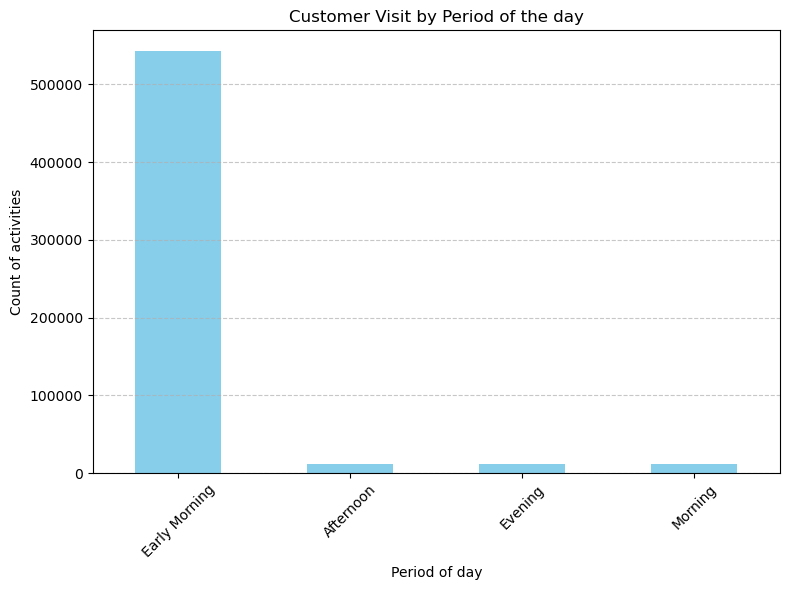

In [42]:
plt.figure(figsize=(8, 6))
period_values.plot(kind='bar', color='skyblue')
plt.title('Customer Visit by Period of the day')
plt.xlabel('Period of day')
plt.ylabel('Count of activities')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

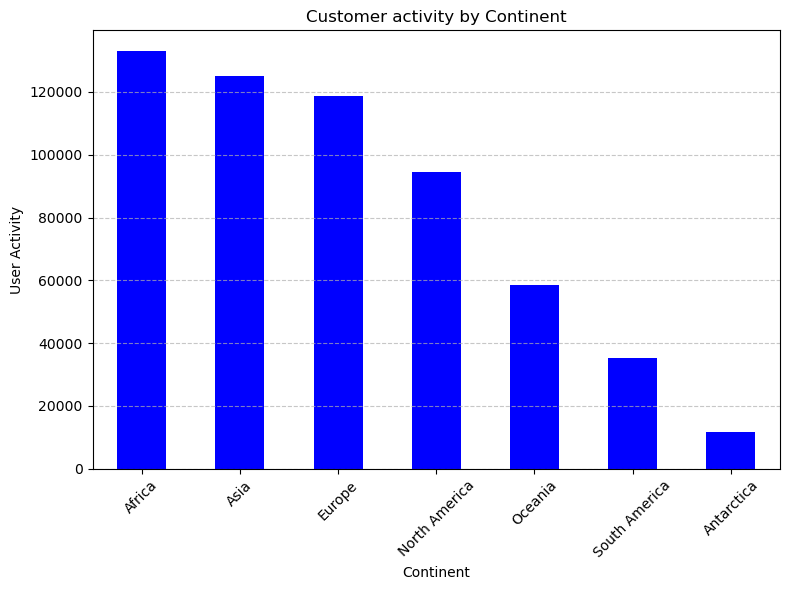

In [50]:
continent_value = data_df['continent'].value_counts()

plt.figure(figsize=(8, 6))
continent_value.plot(kind='bar', color='blue')
plt.title('Customer activity by Continent')
plt.xlabel('Continent')
plt.ylabel('User Activity')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [30]:
event_values = data_df['event_type'].value_counts()

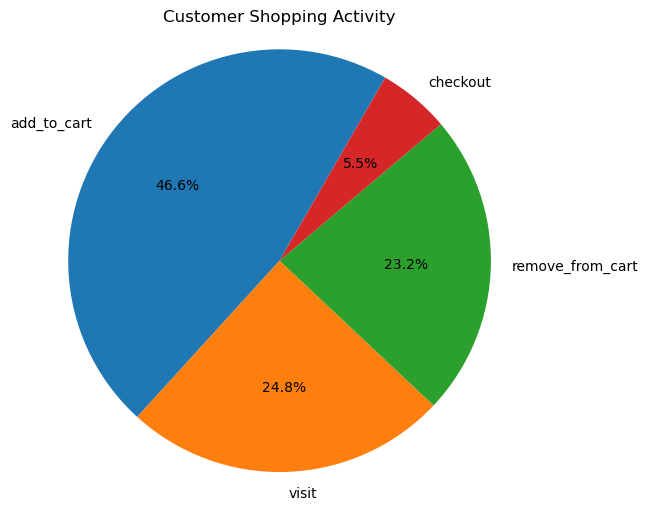

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(event_values, labels=event_values.index, autopct='%1.1f%%', startangle=60)
plt.title('Customer Shopping Activity')
plt.axis('equal')
plt.show()

In [32]:
unique_values_count = data_df['status'].value_counts()

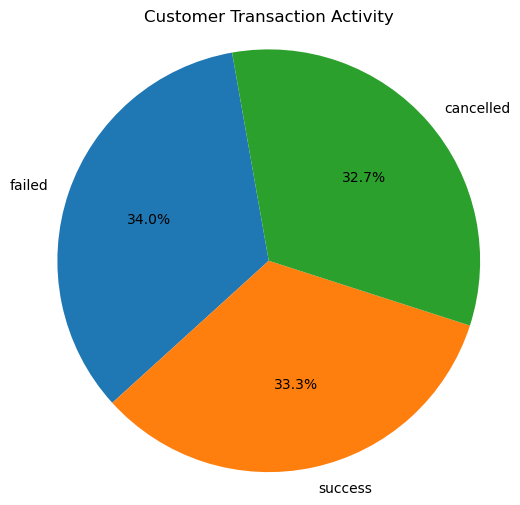

In [33]:
plt.figure(figsize=(6, 6))
plt.pie(unique_values_count, labels=unique_values_count.index, autopct='%1.1f%%', startangle=100)
plt.title('Customer Transaction Activity')
plt.axis('equal')
plt.show()

In [45]:
success = data_df[(data_df['status'] == 'success')]

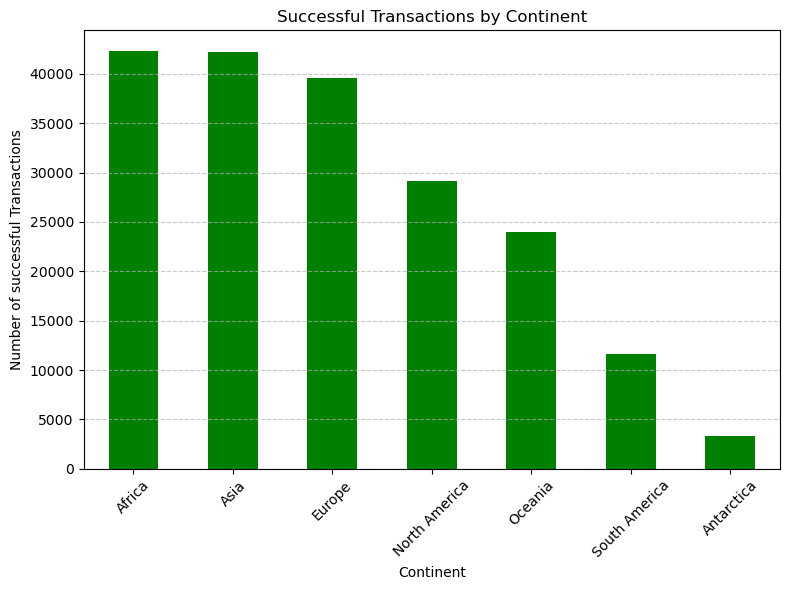

In [51]:
success_value = success['continent'].value_counts()

plt.figure(figsize=(8, 6))
success_value.plot(kind='bar', color='green')
plt.title('Successful Transactions by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of successful Transactions')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [65]:
# Period of the day where Transactions are successfully completed
success['event_period'].value_counts()

event_period
Early Morning    180825
Evening            4014
Afternoon          3943
Morning            3812
Name: count, dtype: int64

In [52]:
failed = data_df[(data_df['status'] == 'failed')]

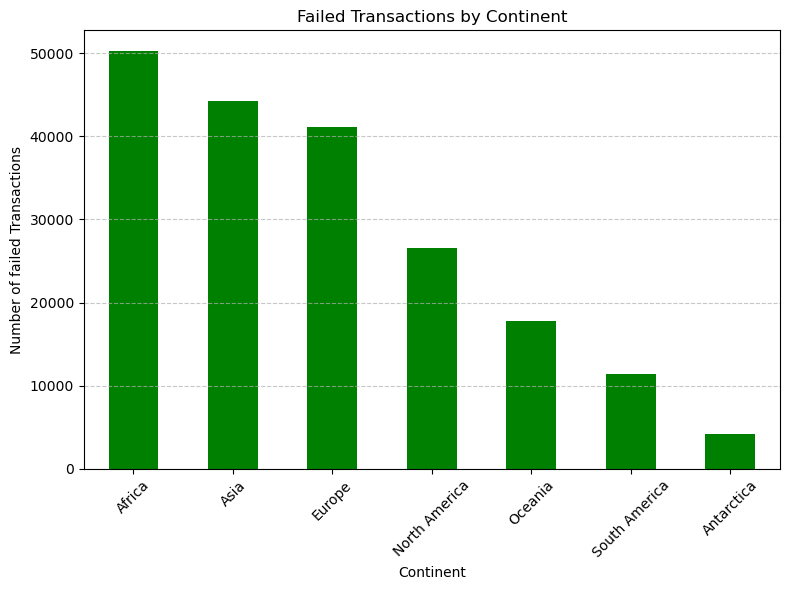

In [54]:
failed_value = failed['continent'].value_counts()

plt.figure(figsize=(8, 6))
failed_value.plot(kind='bar', color='green')
plt.title('Failed Transactions by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of failed Transactions')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [62]:
# top 10 countries with the most successful transactions
success['location'].value_counts().head(10)

location
Korea                     2444
Mauritius                 2374
Albania                   1812
Bosnia and Herzegovina    1770
Panama                    1745
Fiji                      1722
Singapore                 1651
Guernsey                  1625
Thailand                  1617
Kuwait                    1608
Name: count, dtype: int64


## Comments and Recommendations

1.	Product Selection:

    a.	Finding: The website offers only 15 items.

    b.	Recommendation: Expand product selection to cater to a wider range of customer needs and increase sales potential.

2.	Customer Activity:

    a.	Finding: Most website activity occurs between 12 midnight and 6 am.

    b.	Recommendations: 

        i.	Ensure customer support availability during these peak hours.

        ii.	Increase the frequency and targeting of ads during this time frame.

3.	Geographic Reach:

    a.	Finding: Visitors come primarily from Africa, Asia, Europe, and North America.

    b.	Recommendation: Implement strategies to retain customers in these strong markets while exploring ways to improve performance in other regions.

4.	Conversion Rate:

    a.	Finding: Only 5.5% of website visits convert to sales.

    b.	Recommendation: Develop a targeted campaign to convert website traffic into paying customers.

5.	Payment Process:

    a.	Finding: A high percentage (66.7%) of transactions fail or are cancelled.

    b.	Recommendation: Optimize the payment process to ensure a smooth and secure checkout experience. This could involve: 

        i.	Integrating multiple payment options.
        ii. Simplifying checkout procedures.
        iii. Strengthening payment security measures.

6.	Successful Transactions:

    a.	Finding: Africa, Asia, Europe, and North America have the highest successful transaction rates.

    b.	Recommendation: Develop strategies to solidify customer base and increase sales in these key regions.

7.	Top Performing Countries:

    a.	Finding: South Korea leads in successful transactions among the 243 visitor countries.
    
    b.	Recommendation: Analyze the factors contributing to South Korea's success and replicate those strategies in other countries.
